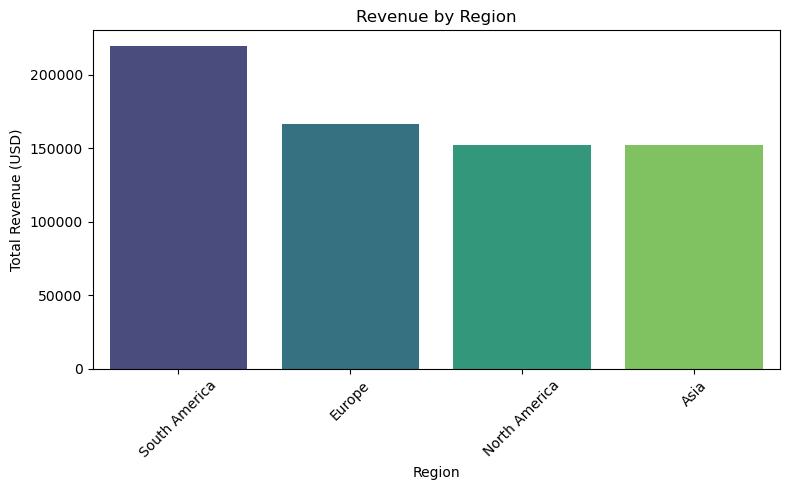

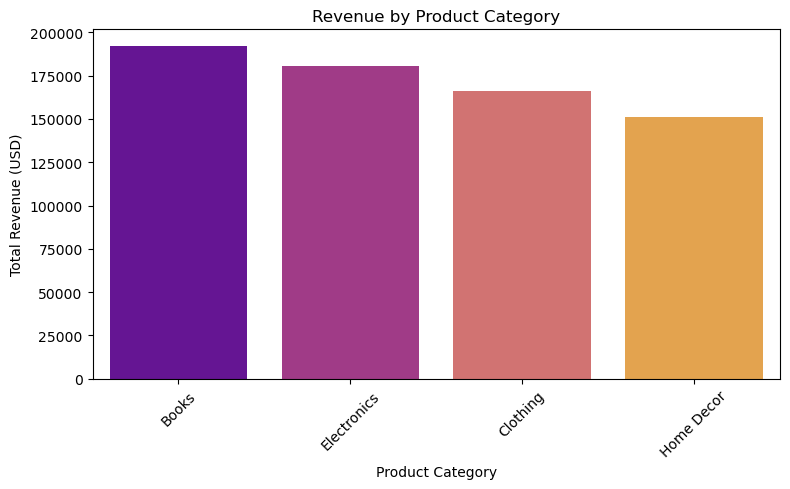

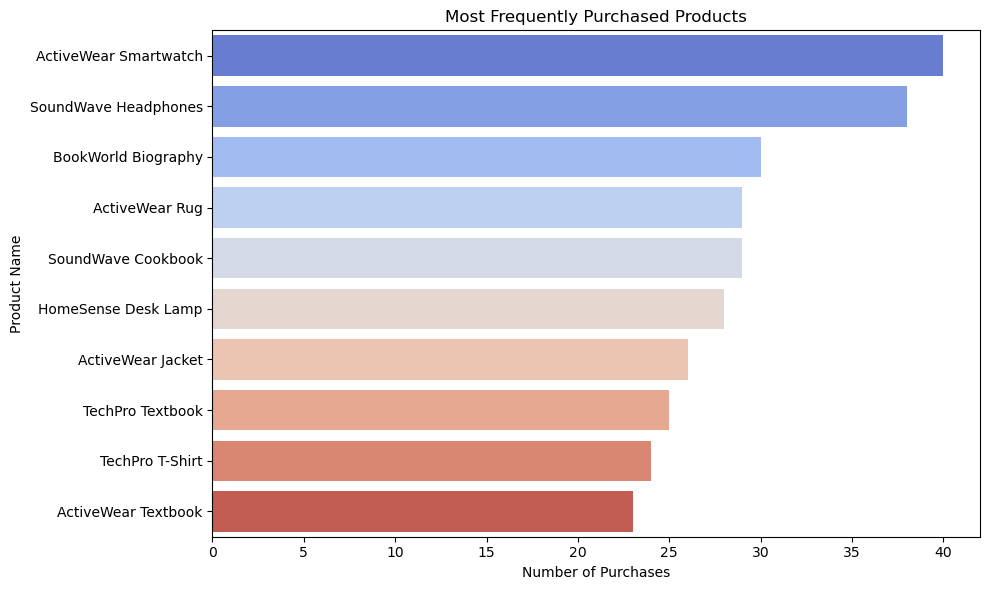

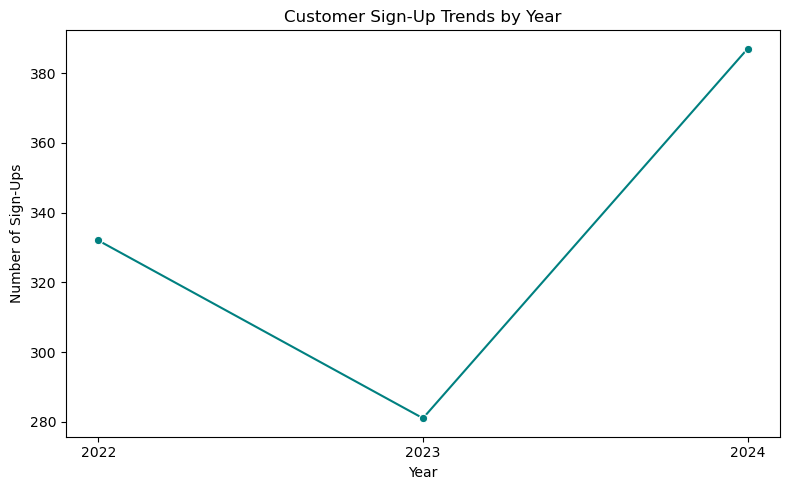

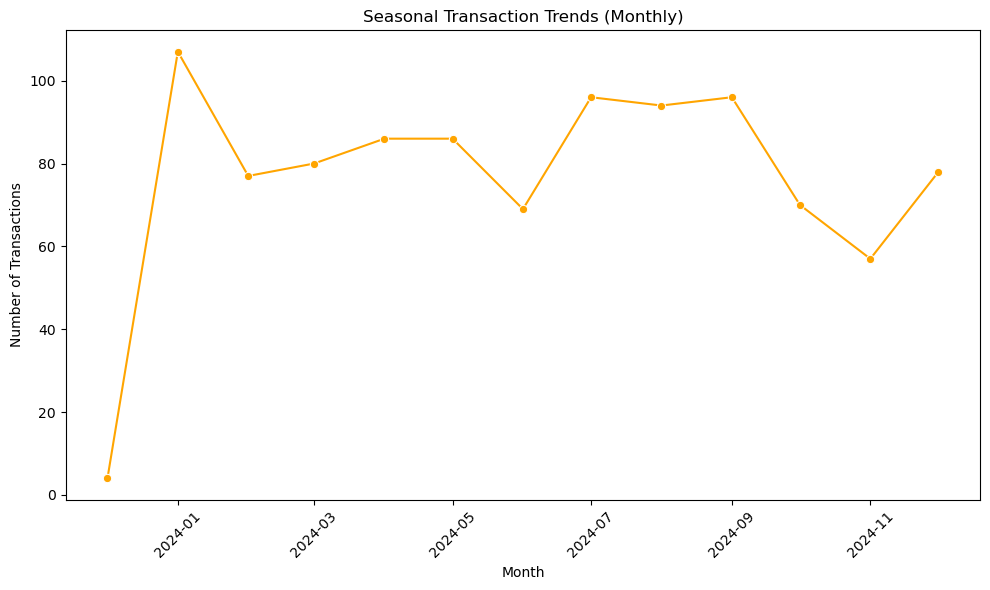

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv(r"C:\Users\siddh\OneDrive\Desktop\data science\Customers.csv")
products = pd.read_csv(r"C:\Users\siddh\OneDrive\Desktop\data science\Products.csv")
transactions = pd.read_csv(r"C:\Users\siddh\OneDrive\Desktop\data science\Transactions.csv")

# Merge datasets for combined analysis
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(transactions_customers, products, on='ProductID', how='left')

# Convert dates to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

# Revenue by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Product Category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="plasma")
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most Frequently Purchased Products
most_frequent_products = merged_data['ProductName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=most_frequent_products.index, x=most_frequent_products.values, palette="coolwarm")
plt.title("Most Frequently Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Customer Sign-Up Trends by Year
signup_trends = merged_data['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='teal')
plt.title("Customer Sign-Up Trends by Year")
plt.ylabel("Number of Sign-Ups")
plt.xlabel("Year")
plt.xticks(signup_trends.index)
plt.tight_layout()
plt.show()

# Seasonal Transaction Trends (Monthly)
monthly_trends = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_trends.index.to_timestamp(), y=monthly_trends.values, marker='o', color='orange')
plt.title("Seasonal Transaction Trends (Monthly)")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
